<a href="https://colab.research.google.com/github/vienskaz/AI-TinderBot/blob/master/blonde_detector_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.utils import to_categorical
import keras
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import classification_report
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
blondes_path='/content/drive/MyDrive/blondes'
notblondes_path='/content/drive/MyDrive/notblonde'

testblondes_path='/content/drive/MyDrive/testblondes'
testnotblondes_path='/content/drive/MyDrive/testnotblonde'

In [3]:
blonde_files = [f for f in os.listdir(blondes_path) if os.path.isfile(os.path.join(blondes_path, f))]

blonde_arrays=[]
for blonde_file in blonde_files:
  blonde_path=os.path.join(blondes_path, blonde_file)
  blonde=Image.open(blonde_path).convert('RGB')

  blonde_array=np.array(blonde)
  blonde_arrays.append(blonde_array)
blonde_arrays=np.array(blonde_arrays)


testblonde_files = [f for f in os.listdir(testblondes_path) if os.path.isfile(os.path.join(testblondes_path, f))]

testblonde_arrays=[]
for testblonde_file in testblonde_files:
  testblonde_path=os.path.join(testblondes_path, testblonde_file)
  testblonde=Image.open(testblonde_path).convert('RGB')

  testblonde_array=np.array(testblonde)
  testblonde_arrays.append(testblonde_array)
testblonde_arrays=np.array(testblonde_arrays)

<ipython-input-3-5955ca03c4d2>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  blonde_arrays=np.array(blonde_arrays)
<ipython-input-3-5955ca03c4d2>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testblonde_arrays=np.array(testblonde_arrays)


In [4]:
notblonde_files = [f for f in os.listdir(notblondes_path) if os.path.isfile(os.path.join(notblondes_path, f))]

notblonde_arrays=[]
for notblonde_file in notblonde_files:
  notblonde_path=os.path.join(notblondes_path, notblonde_file)
  notblonde=Image.open(notblonde_path).convert('RGB')

  notblonde_array=np.array(notblonde)
  notblonde_arrays.append(notblonde_array)
notblonde_arrays=np.array(notblonde_arrays)


testnotblonde_files = [f for f in os.listdir(testnotblondes_path) if os.path.isfile(os.path.join(testnotblondes_path, f))]

testnotblonde_arrays=[]
for testnotblonde_file in testnotblonde_files:
  testnotblonde_path=os.path.join(testnotblondes_path, testnotblonde_file)
  testnotblonde=Image.open(testnotblonde_path).convert('RGB')

  testnotblonde_array=np.array(testnotblonde)
  testnotblonde_arrays.append(testnotblonde_array)
testnotblonde_arrays=np.array(testnotblonde_arrays)

<ipython-input-4-5b812031d76b>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notblonde_arrays=np.array(notblonde_arrays)
<ipython-input-4-5b812031d76b>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testnotblonde_arrays=np.array(testnotblonde_arrays)


In [5]:
labels=[]
for blonde in blonde_arrays:
  labels.append(1)
for notblonde in notblonde_arrays:
  labels.append(0)
labels=np.array(labels)
y_train=to_categorical(labels)


testlabels=[]
for testblonde in testblonde_arrays:
  testlabels.append(1)
for testnotblonde in testnotblonde_arrays:
  testlabels.append(0)
testlabels=np.array(testlabels)
y_test=to_categorical(testlabels)

In [6]:
x_train=np.hstack((blonde_arrays,notblonde_arrays))
x_train=np.array(x_train)
print(x_train[0].shape)

(262, 193, 3)


In [7]:
x_test=np.hstack((testblonde_arrays,testnotblonde_arrays))
x_test=np.array(x_test)
print(x_test[0].shape)

(191, 264, 3)


In [9]:
x_test.shape

(335,)

In [8]:
def resize_and_normalize_images(image_array, target_size=(256, 256)):
    normalized_images = []
    for image in image_array:
        resized_image = cv2.resize(image, target_size)
        normalized_image = resized_image / 255.0
        normalized_images.append(normalized_image)

    return np.array(normalized_images)

In [9]:
x_train=resize_and_normalize_images(x_train)

In [10]:
x_test=resize_and_normalize_images(x_test)

In [13]:
print(x_train.shape)
print(x_test.shape)




(1147, 256, 256, 3)
(335, 256, 256, 3)


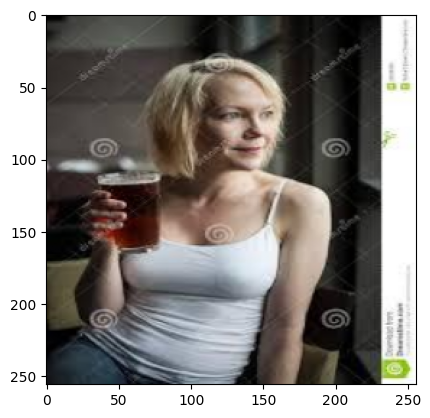

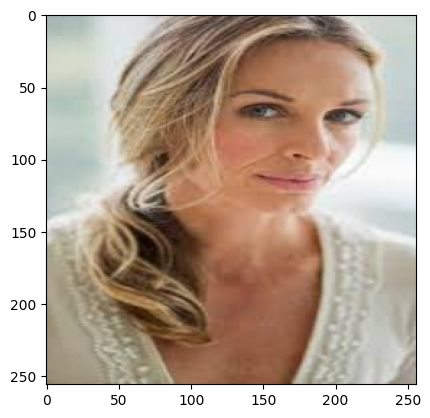

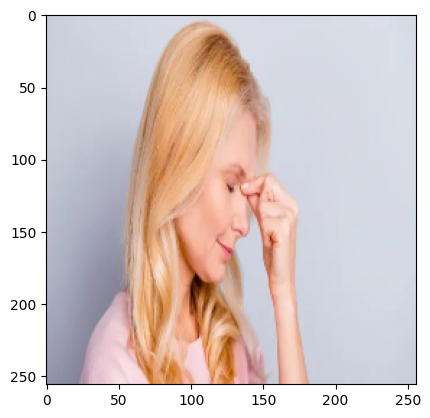

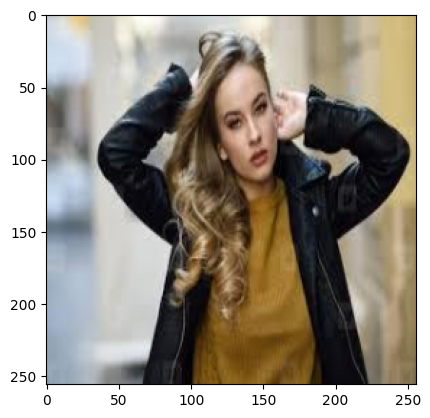

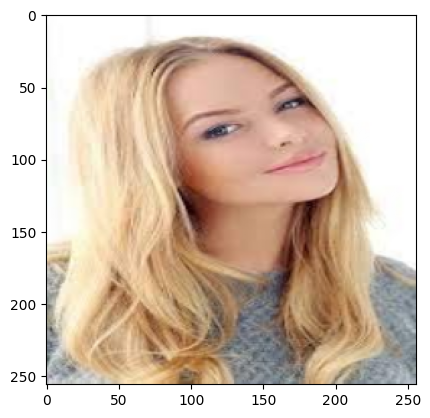

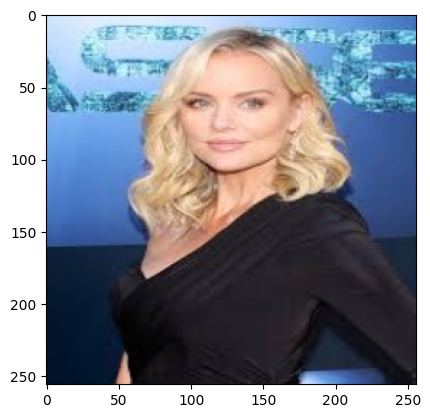

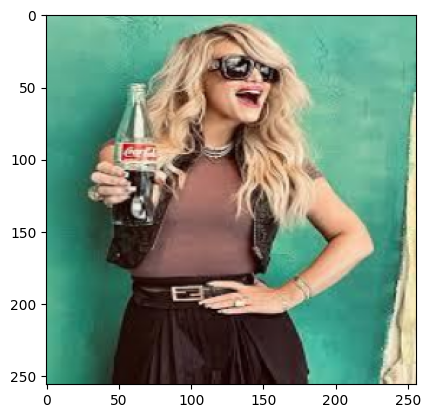

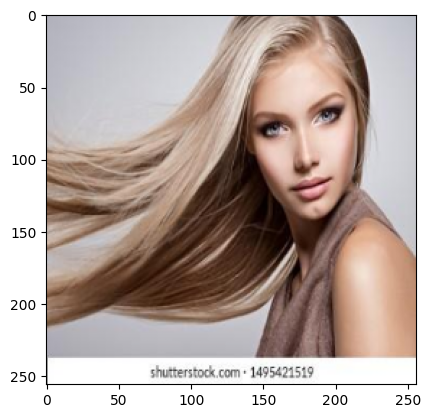

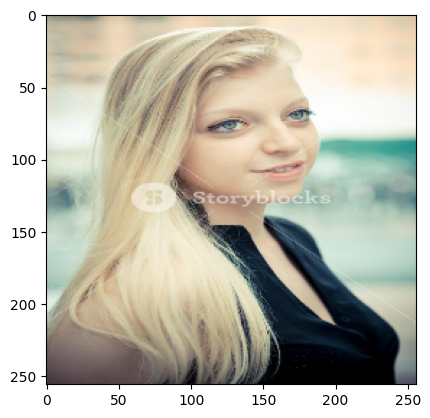

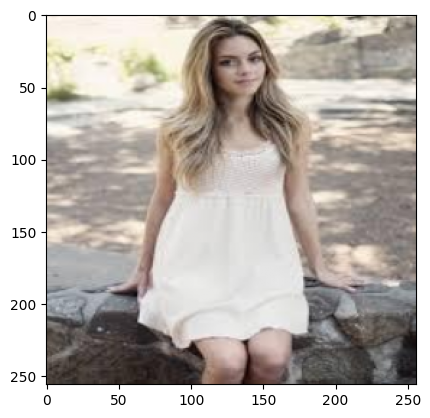

In [14]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

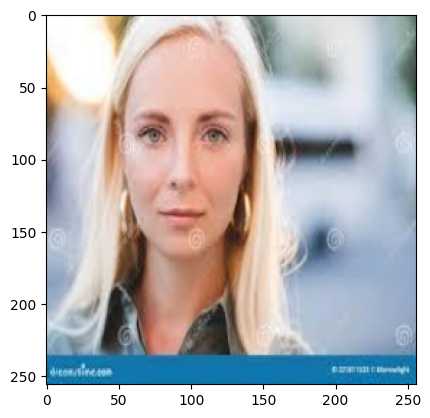

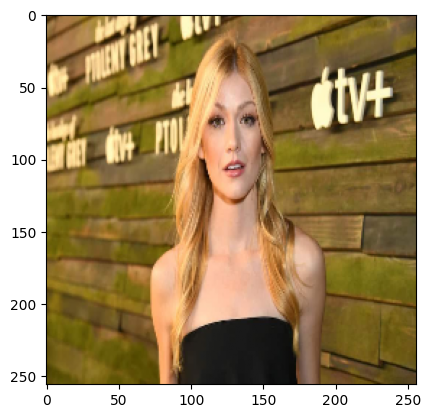

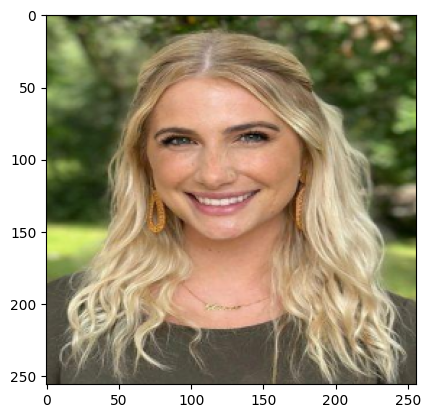

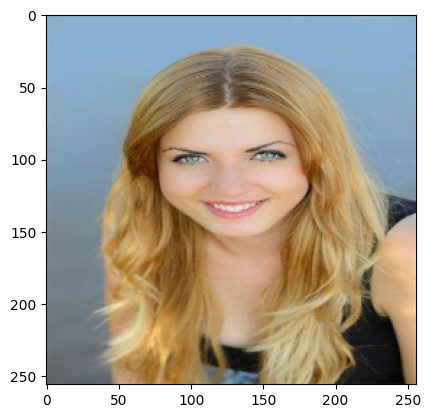

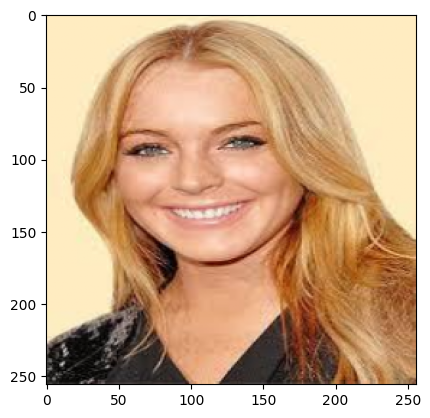

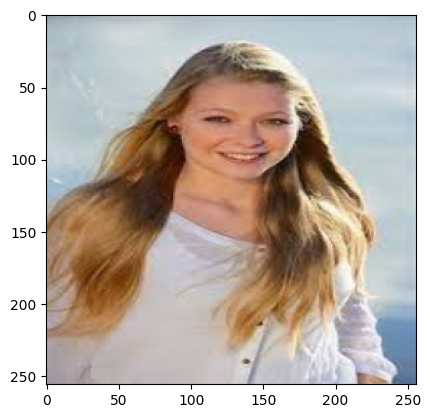

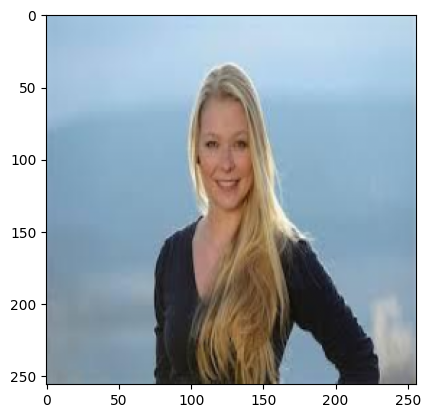

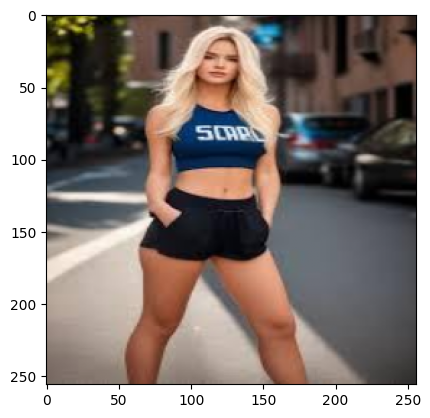

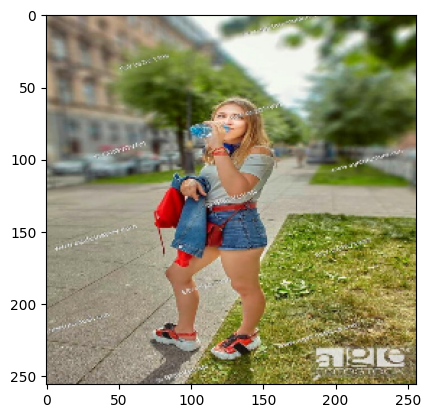

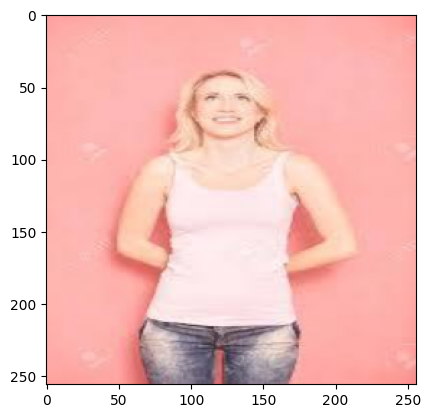

In [17]:
for i in range(10):
  plt.imshow(x_test[i])
  plt.show()

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [16]:
data_augmentation = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)
train_iterator= data_augmentation.flow(X_train,Y_train,shuffle=True)
val_iterator= data_augmentation.flow(X_val,Y_val,shuffle=False)

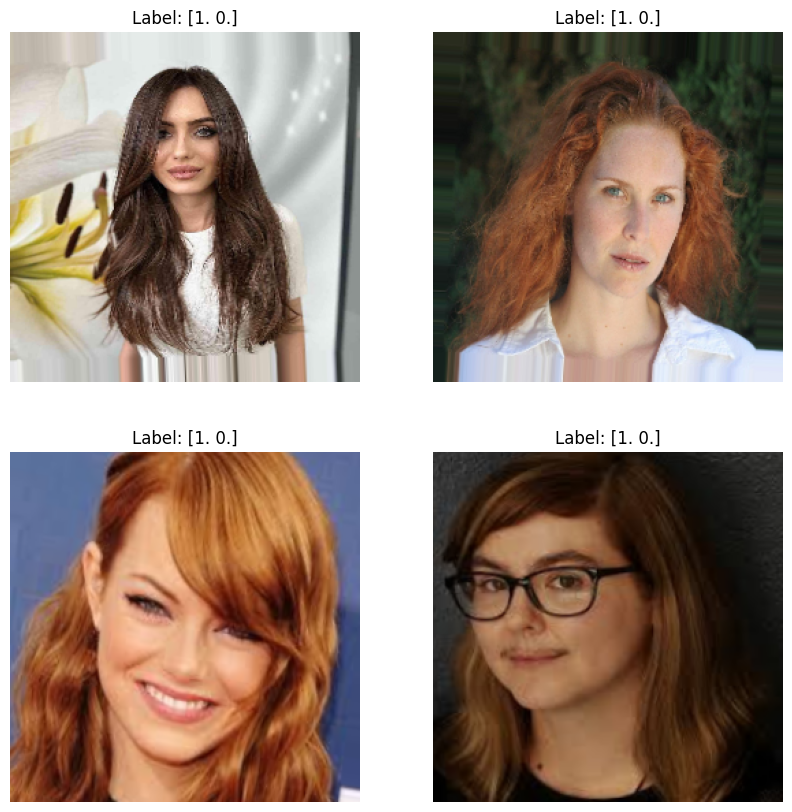

In [18]:
batch_size = 4  # You can adjust this as needed
augmented_images, augmented_labels = train_iterator.next()

# Display the augmented images
plt.figure(figsize=(10, 10))
for i in range(batch_size):
    plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f'Label: {augmented_labels[i]}')
    plt.axis('off')

plt.show()

In [35]:
from tensorflow.keras.applications.vgg16 import VGG16

model = keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
    VGG16(include_top=False, weights='imagenet'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

# Unfreeze the last few layers of the entire model
for layer in model.layers[-5:]:
    layer.trainable = True

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 23104066 (88.14 MB)
Trainable params: 23104066 (88.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('blonde_detector_vgg16.h5',
                                   monitor='val_accuracy',
                                   save_best_only=True)


In [37]:
history = model.fit(
    train_iterator,
    epochs=30,
    batch_size=32,
    validation_data=val_iterator,
    shuffle=True,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
29/29 [==============================] - 78s 3s/step - loss: 0.6788 - accuracy: 0.6510 - val_loss: 0.6560 - val_accuracy: 0.6391
Epoch 2/30
29/29 [==============================] - 25s 844ms/step - loss: 0.6494 - accuracy: 0.6532 - val_loss: 0.6533 - val_accuracy: 0.6391
Epoch 3/30
29/29 [==============================] - 26s 909ms/step - loss: 0.6539 - accuracy: 0.6532 - val_loss: 0.6562 - val_accuracy: 0.6391
Epoch 4/30
29/29 [==============================] - 26s 883ms/step - loss: 0.6418 - accuracy: 0.6532 - val_loss: 0.6449 - val_accuracy: 0.6391
Epoch 5/30
29/29 [==============================] - 83s 3s/step - loss: 0.6078 - accuracy: 0.6728 - val_loss: 0.5856 - val_accuracy: 0.7522
Epoch 6/30
29/29 [==============================] - 86s 3s/step - loss: 0.4046 - accuracy: 0.8222 - val_loss: 0.3479 - val_accuracy: 0.8522
Epoch 7/30
29/29 [==============================] - 87s 3s/step - loss: 0.3223 - accuracy: 0.8593 - val_loss: 0.2915 - val_accuracy: 0.8826
Epoch 8/30


In [12]:
model=keras.models.load_model('blonde_detector_effv2.h5')

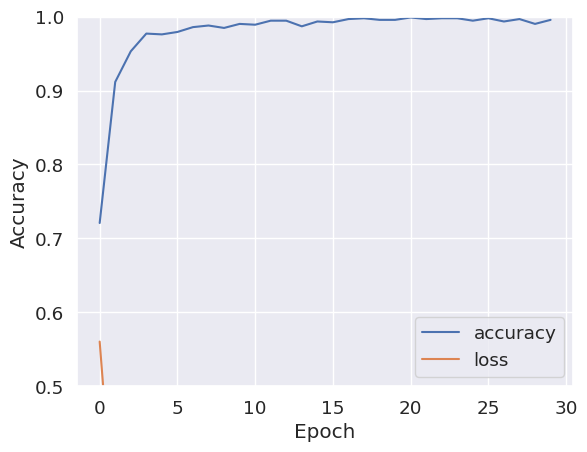

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [13]:
loss, accuracy=model.evaluate(x_test,y_test)
print(f'Loss={loss}')
print(f'{accuracy * 100:.2f}%')


11/11 [==============================] - 16s 601ms/step - loss: 0.3252 - accuracy: 0.8776
Loss=0.3252045810222626
87.76%


11/11 [==============================] - 2s 164ms/step
[[168   7]
 [ 34 126]]


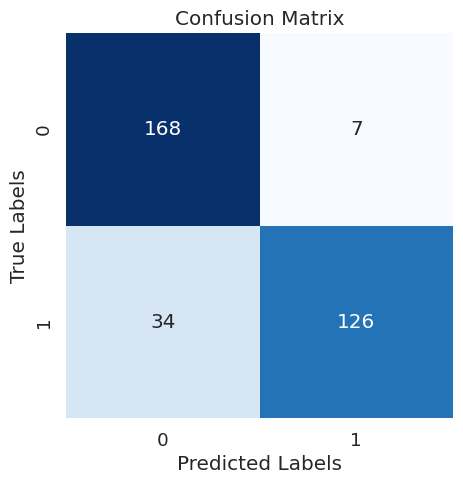

In [14]:
# Assuming y_test is one-hot encoded, convert it to class labels
y_test = np.argmax(y_test, axis=1)

# Get predicted classes
y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
from google.colab import files
model_path = '/content/blonde_detector_effv2.h5'

# Trigger the file download
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
def resize_and_normalize_image(image, target_size=(256, 256)):
    image_array = np.array(image)
    resized_image = cv2.resize(image_array, target_size)
    normalized_image = resized_image / 255.0
    normalized_image=np.expand_dims(normalized_image, axis=0)
    return normalized_image

In [ ]:
test=Image.open('/content/test1.jpg')

test1=np.array(test)

test1=resize_and_normalize_image(test1)
y_pred=model.predict(test1)
result = np.argmax(y_pred, axis=1)
print(result)

1/1 [==============================] - 0s 46ms/step
[1]
